In [1]:
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import seaborn as sns

import scienceplots
#plt.style.use(['science', 'ieee', 'notebook'])

In [2]:
binary = os.path.join(os.getcwd(), 'data', 'volve_compiled.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    data = pickle.load(bin_file)

/mnt/d/OneDrive/Mestrado/gits/sklearn-sid/Volve-Dataset/data/volve_compiled.pkl


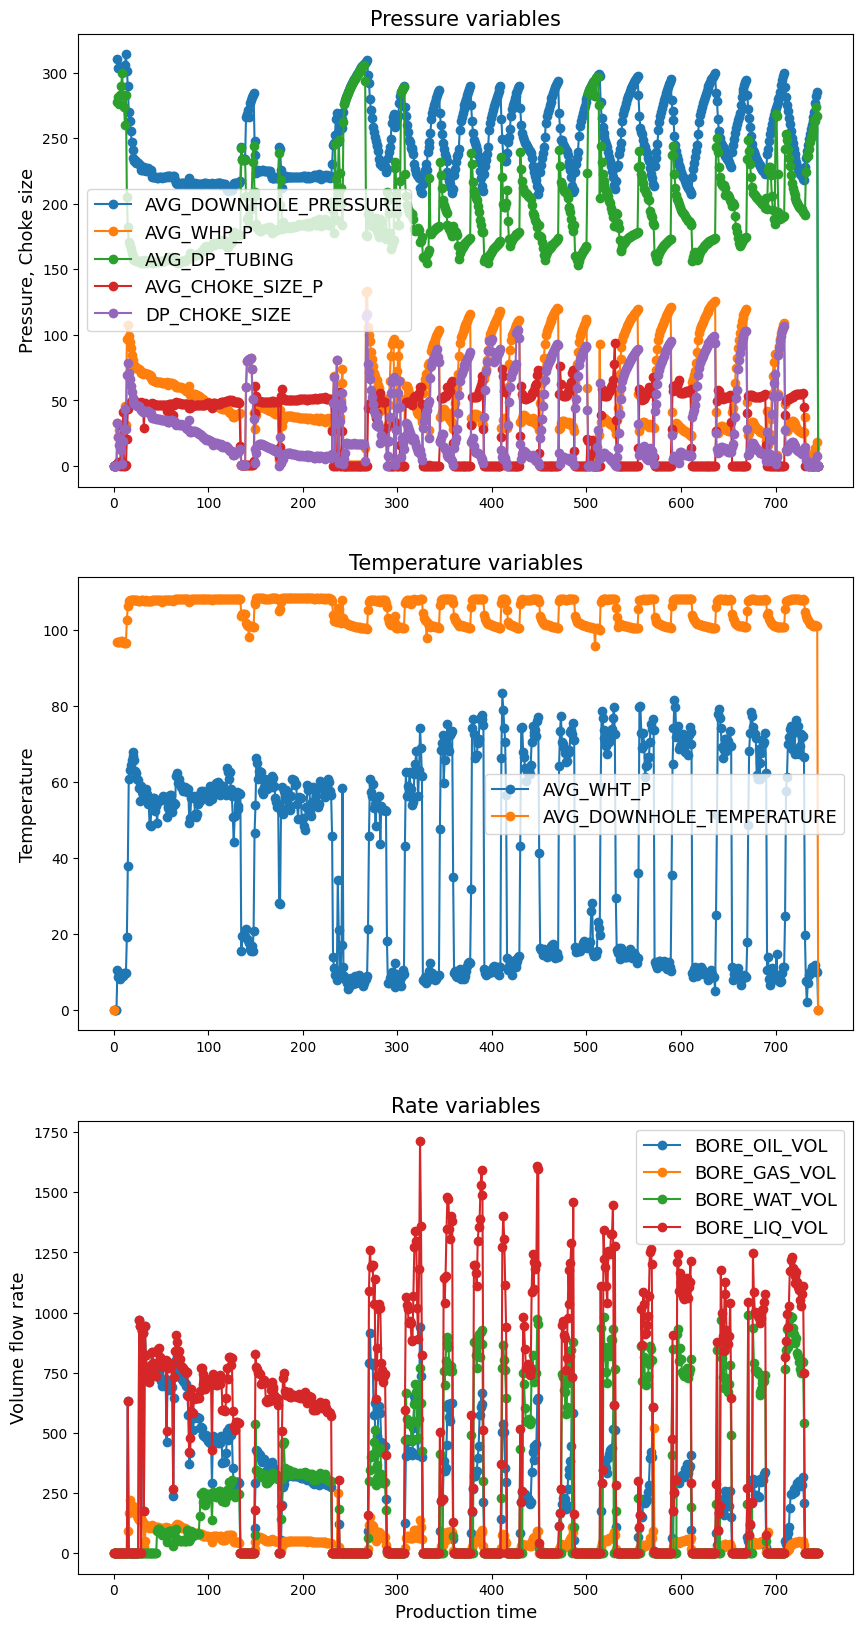

In [3]:
case = "15/9-F-1 C"
#case = "15/9-F-11"

data_case = data['OP'][case]

filt_vars_IN_Q =  [
        'BORE_OIL_VOL',
        'BORE_GAS_VOL',
        'BORE_WAT_VOL',
        #'BORE_OIL_CUM',
        #'BORE_LIQ_CUM',
        #'BORE_GAS_CUM',
        #'BORE_WAT_CUM',
]

filt_vars_IN_QINJ = [
        #'BORE_WI_VOL',
        #'BORE_WI_CUM',
]

filt_vars_IN_P = [
        'AVG_DOWNHOLE_PRESSURE',
        'AVG_WHP_P',
        'AVG_DP_TUBING',
        #'AVG_ANNULUS_PRESS',
        'AVG_CHOKE_SIZE_P',
        'DP_CHOKE_SIZE',
]

filt_vars_IN_T = [
        'AVG_WHT_P',
        'AVG_DOWNHOLE_TEMPERATURE',
]

filt_vars_OUT = [
        'BORE_OIL_VOL',
        'BORE_GAS_VOL',
        'BORE_WAT_VOL',
        'BORE_LIQ_VOL',
]

time = data_case['N']
fig, ax = plt.subplots(3,1, figsize=(10, 20))
for var in filt_vars_IN_P:
    ax[0].plot(time, data_case[var], '-o', label=var)
for var in filt_vars_IN_T:
    ax[1].plot(time, data_case[var], '-o', label=var)
for var in filt_vars_OUT:
    ax[2].plot(time, data_case[var], '-o', label=var)
#for var in filt_vars_OUT:
#    ax[3].plot(time, data_case[var], '-o', label=var)
title_font = 15
label_font = 13
ax[0].set_title(f'Pressure variables', fontsize=title_font)
ax[1].set_title(f'Temperature variables', fontsize=title_font)
ax[2].set_title(f'Rate variables', fontsize=title_font)
ax[0].set_ylabel('Pressure, Choke size', fontsize=label_font)
ax[1].set_ylabel('Temperature', fontsize=label_font)
ax[2].set_ylabel('Volume flow rate', fontsize=label_font)
ax[2].set_xlabel('Production time', fontsize=label_font)
ax[0].legend(fontsize=label_font)
ax[1].legend(fontsize=label_font)
ax[2].legend(fontsize=label_font)

fig.savefig('data/data_example.pdf',  bbox_inches = "tight")

In [4]:
prefix = 'SIMO.W1'
binary = os.path.join(os.getcwd(), 'outputs', 'test_runs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/OneDrive/Mestrado/gits/sklearn-sid/Volve-Dataset/outputs/test_runs/SIMO.W1_ml.pkl


In [5]:
model_pars = []
best_pars = []
yhats = []
lags = []
for index, row in pd.DataFrame(results).iloc[2:,:].iterrows():
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1)])
    try:
        best_pars.append((f"{row['MODEL']}.{prefix}", row['MODEL OBJ'].estimator.best_params_))
        model_pars.append((f"{row['MODEL']}.{prefix}", row['MODEL OBJ'].estimator.cv_results_))
        lags.append((f"{row['MODEL']}.{prefix}", row['MODEL OBJ'].nX))
    except Exception as e: 
        best_pars.append((f"{row['MODEL']}.{prefix}", None))
        model_pars.append((f"{row['MODEL']}.{prefix}", None))
        lags.append((f"{row['MODEL']}.{prefix}", row['MODEL OBJ'].nX))


In [6]:
prefix = 'MIMO.W1'
binary = os.path.join(os.getcwd(), 'outputs', 'test_runs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/OneDrive/Mestrado/gits/sklearn-sid/Volve-Dataset/outputs/test_runs/MIMO.W1_ml.pkl


In [7]:
for index, row in pd.DataFrame(results).iloc[2:,:].iterrows():
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1)])
    try:
        best_pars.append((f"{row['MODEL']}.{prefix}", row['MODEL OBJ'].estimator.best_params_))
        model_pars.append((f"{row['MODEL']}.{prefix}", row['MODEL OBJ'].estimator.cv_results_))
        lags.append((f"{row['MODEL']}.{prefix}", row['MODEL OBJ'].nX))
    except Exception as e: 
        best_pars.append((f"{row['MODEL']}.{prefix}", None))
        model_pars.append((f"{row['MODEL']}.{prefix}", None))
        lags.append((f"{row['MODEL']}.{prefix}", row['MODEL OBJ'].nX))

GradientBoosting.SIMO.W1
R2 Train (OSA): 0.9788072265109689
R2 Test (OSA): 0.7812098014239206
R2 Full  (OSA): 0.9126601480616652
R2 Train (FS):  0.48191473246022576
R2 Test (FS):  0.4156227527923705
R2 Full  (FS):  0.4645438100157353
RMSE Train (OSA): 0.0340921158254598
RMSE Test (OSA): 0.11958197805478427
RMSE Full  (OSA): 0.0715159001367181
RMSE Train (FS):  0.1685623892409296
RMSE Test (FS):  0.19543324848104723
RMSE Full  (FS):  0.17707545048308407
RandomForest.SIMO.W1
R2 Train (OSA): 0.943612582015465
R2 Test (OSA): 0.7878073497372408
R2 Full  (OSA): 0.8918300535570394
R2 Train (FS):  0.35818010591738625
R2 Test (FS):  0.346549234590918
R2 Full  (FS):  0.3603300372740149
RMSE Train (OSA): 0.055609777994573846
RMSE Test (OSA): 0.11776519900983226
RMSE Full  (OSA): 0.07958838478064616
RMSE Train (FS):  0.1876146054303161
RMSE Test (FS):  0.20666086234587686
RMSE Full  (FS):  0.1935416158139468
DecisionTree.SIMO.W1
R2 Train (OSA): 0.8876588325760746
R2 Test (OSA): 0.7421216854593489


Text(10, 0.95, 'Train set')

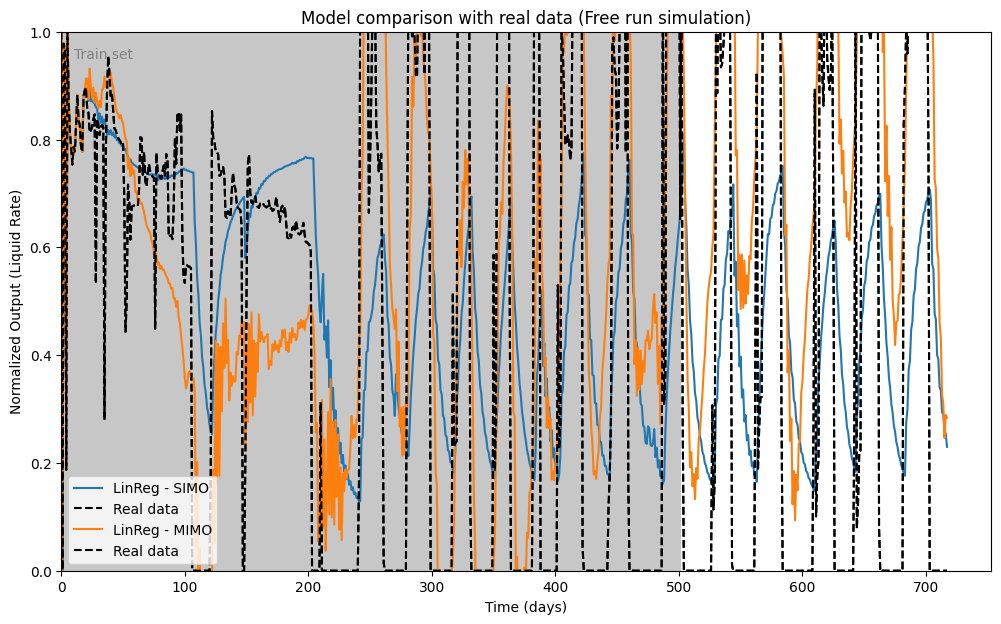

In [8]:
errors = {
    'MODEL':[],
    'INPUTS':[],
    'R2 OSA TRAIN':[],
    'R2 OSA TEST':[],
    'R2 OSA TOTAL':[],
    'R2 FS TRAIN':[],
    'R2 FS TEST':[],
    'R2 FS TOTAL':[],
    'RMSE OSA TRAIN':[],
    'RMSE OSA TEST':[],
    'RMSE OSA TOTAL':[],
    'RMSE FS TRAIN':[],
    'RMSE FS TEST':[],
    'RMSE FS TOTAL':[],
    }

fig, ax   = plt.subplots(1,1, figsize=(12,7))
for model, yhat, yhat_OSA in yhats:
    model_name = model.split('.')[0]
    model_input = model.split('.')[1]
    errors['MODEL'].append(model_name)
    errors['INPUTS'].append(model_input)
    #if not model_name in ['PolyReg', 'LinReg', 'MLP']: continue
    print(model)
    print('R2 Train (OSA):', r2_score((y_te[:,0]+y_te[:,2])[:502], (yhat_OSA[:,0]+yhat_OSA[:,2])[:502]))
    errors['R2 OSA TRAIN'].append(r2_score((y_te[:,0]+y_te[:,2])[:502], (yhat_OSA[:,0]+yhat_OSA[:,2])[:502]))
    print('R2 Test (OSA):', r2_score((y_te[:,0]+y_te[:,2])[502:], (yhat_OSA[:,0]+yhat_OSA[:,2])[502:]))
    errors['R2 OSA TEST'].append(r2_score((y_te[:,0]+y_te[:,2])[502:], (yhat_OSA[:,0]+yhat_OSA[:,2])[502:]))
    print('R2 Full  (OSA):', r2_score((y_te[:,0]+y_te[:,2]), (yhat_OSA[:,0]+yhat_OSA[:,2])))
    errors['R2 OSA TOTAL'].append(r2_score((y_te[:,0]+y_te[:,2]), (yhat_OSA[:,0]+yhat_OSA[:,2])))
    print('R2 Train (FS): ', r2_score((y_te[:,0]+y_te[:,2])[:502], (yhat[:,0]+yhat[:,2])[:502]))
    errors['R2 FS TRAIN'].append(r2_score((y_te[:,0]+y_te[:,2])[:502], (yhat[:,0]+yhat[:,2])[:502]))
    print('R2 Test (FS): ', r2_score((y_te[:,0]+y_te[:,2])[502:], (yhat[:,0]+yhat[:,2])[502:]))
    errors['R2 FS TEST'].append(r2_score((y_te[:,0]+y_te[:,2])[502:], (yhat[:,0]+yhat[:,2])[502:]))
    print('R2 Full  (FS): ', r2_score((y_te[:,0]+y_te[:,2]), (yhat[:,0]+yhat[:,2])))
    errors['R2 FS TOTAL'].append(r2_score((y_te[:,0]+y_te[:,2])[:], (yhat[:,0]+yhat[:,2])[:]))
    print('RMSE Train (OSA):', mean_squared_error((y_te[:,0]+y_te[:,2])[:502], (yhat_OSA[:,0]+yhat_OSA[:,2])[:502])**0.5/2.0)
    errors['RMSE OSA TRAIN'].append(mean_squared_error((y_te[:,0]+y_te[:,2])[:502], (yhat_OSA[:,0]+yhat_OSA[:,2])[:502])**0.5/2.0)
    print('RMSE Test (OSA):', mean_squared_error((y_te[:,0]+y_te[:,2])[502:], (yhat_OSA[:,0]+yhat_OSA[:,2])[502:])**0.5/2.0)
    errors['RMSE OSA TEST'].append(mean_squared_error((y_te[:,0]+y_te[:,2])[502:], (yhat_OSA[:,0]+yhat_OSA[:,2])[502:])**0.5/2.0)
    print('RMSE Full  (OSA):', mean_squared_error((y_te[:,0]+y_te[:,2]), (yhat_OSA[:,0]+yhat_OSA[:,2]))**0.5/2.0)
    errors['RMSE OSA TOTAL'].append(mean_squared_error((y_te[:,0]+y_te[:,2])[:], (yhat_OSA[:,0]+yhat_OSA[:,2])[:])**0.5/2.0)
    print('RMSE Train (FS): ', mean_squared_error((y_te[:,0]+y_te[:,2])[:502], (yhat[:,0]+yhat[:,2])[:502])**0.5/2.0)
    errors['RMSE FS TRAIN'].append(mean_squared_error((y_te[:,0]+y_te[:,2])[:502], (yhat[:,0]+yhat[:,2])[:502])**0.5/2.0)
    print('RMSE Test (FS): ', mean_squared_error((y_te[:,0]+y_te[:,2])[502:], (yhat[:,0]+yhat[:,2])[502:])**0.5/2.0)
    errors['RMSE FS TEST'].append(mean_squared_error((y_te[:,0]+y_te[:,2])[502:], (yhat[:,0]+yhat[:,2])[502:])**0.5/2.0)
    print('RMSE Full  (FS): ', mean_squared_error((y_te[:,0]+y_te[:,2]), (yhat[:,0]+yhat[:,2]))**0.5/2.0)
    errors['RMSE FS TOTAL'].append(mean_squared_error((y_te[:,0]+y_te[:,2])[:], (yhat[:,0]+yhat[:,2])[:])**0.5/2.0)
    if not 'LinReg' in model: continue
    ax.plot(yhat[:,0]+yhat[:,2], label=' - '.join(model.split('.')[:-1]))
    ax.plot(y_te[:,0]+y_te[:,2], 'k--', label='Real data')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Normalized Output (Liquid Rate)')
    ax.set_title('Model comparison with real data (Free run simulation)')
    ax.fill_between(np.arange(0, len(yhat)), 0, 1, where = np.arange(0, len(yhat))<=502,
                facecolor ='grey', alpha = 0.25)
ax.legend()
ax.set_xlim(0,None)
ax.set_ylim(0,1)
ax.text(10, 0.95, 'Train set', color='grey')
#fig.savefig(f'./outputs/final_results/best_model.pdf')

In [9]:
results_df = pd.DataFrame(errors).sort_values('R2 FS TOTAL', ascending=False).reset_index().sort_values('index').reset_index()
results_df['BEST LAG'] = np.array([lag[-1] for lag in lags])
results_df['level_0'] += 1
results_df = results_df[['MODEL', 'INPUTS', 'BEST LAG', 'R2 OSA TRAIN', 'R2 FS TRAIN', 'RMSE OSA TRAIN', 'RMSE FS TRAIN', 'R2 OSA TOTAL', 'R2 FS TOTAL', 'RMSE OSA TOTAL', 'RMSE FS TOTAL', 'level_0']].round(3)

In [10]:
results_df

MODEL INPUTS  BEST LAG  R2 OSA TRAIN  R2 FS TRAIN   
0   GradientBoosting   SIMO        20         0.979        0.482  \
1       RandomForest   SIMO        17         0.944        0.358   
2       DecisionTree   SIMO        17         0.888        0.481   
3                KNN   SIMO         7         0.996        0.502   
4                SVM   SIMO        20         0.821        0.521   
5            PolyReg   SIMO        20         0.785        0.254   
6             LinReg   SIMO        20         0.786        0.213   
7   GradientBoosting   MIMO         9         0.957        0.575   
8       RandomForest   MIMO        16         0.935        0.571   
9       DecisionTree   MIMO        10         0.880        0.554   
10               KNN   MIMO        20         1.000        0.697   
11               SVM   MIMO        20         0.844        0.634   
12           PolyReg   MIMO         2         0.807        0.618   
13            LinReg   MIMO        20         0.820        0.432   

    RMSE OSA TRAIN  RMSE FS TRAIN  R2 OSA TOTAL  R2 FS TOTAL  RMSE OSA TOTAL   
0            0.034          0.169         0.913        0.465           0.072  \
1            0.056          0.188         0.892        0.360           0.080   
2            0.078          0.169         0.840        0.522           0.097   
3            0.015          0.165         0.883        0.434           0.083   
4            0.099          0.162         0.806        0.571           0.107   
5            0.109          0.202         0.783        0.273           0.113   
6            0.108          0.208         0.782        0.224           0.113   
7            0.049          0.153         0.899        0.490           0.077   
8            0.060          0.153         0.885        0.549           0.082   
9            0.081          0.156         0.835        0.572           0.098   
10           0.000          0.129         0.894        0.637           0.079   
11           0.093          0.142         0.808        0.624           0.106   
12           0.103          0.145         0.798        0.635           0.109   
13           0.099          0.177         0.802        0.198           0.108   

    RMSE FS TOTAL  level_0  
0           0.177        9  
1           0.194       11  
2           0.167        7  
3           0.182       10  
4           0.158        5  
5           0.206       12  
6           0.213       13  
7           0.173        8  
8           0.163        6  
9           0.158        4  
10          0.146        1  
11          0.148        3  
12          0.146        2  
13          0.217       14

In [11]:
print(results_df.to_latex(index=False,))

\begin{tabular}{llrrrrrrrrrr}
\toprule
MODEL & INPUTS & BEST LAG & R2 OSA TRAIN & R2 FS TRAIN & RMSE OSA TRAIN & RMSE FS TRAIN & R2 OSA TOTAL & R2 FS TOTAL & RMSE OSA TOTAL & RMSE FS TOTAL & level_0 \\
\midrule
GradientBoosting & SIMO & 20 & 0.979000 & 0.482000 & 0.034000 & 0.169000 & 0.913000 & 0.465000 & 0.072000 & 0.177000 & 9 \\
RandomForest & SIMO & 17 & 0.944000 & 0.358000 & 0.056000 & 0.188000 & 0.892000 & 0.360000 & 0.080000 & 0.194000 & 11 \\
DecisionTree & SIMO & 17 & 0.888000 & 0.481000 & 0.078000 & 0.169000 & 0.840000 & 0.522000 & 0.097000 & 0.167000 & 7 \\
KNN & SIMO & 7 & 0.996000 & 0.502000 & 0.015000 & 0.165000 & 0.883000 & 0.434000 & 0.083000 & 0.182000 & 10 \\
SVM & SIMO & 20 & 0.821000 & 0.521000 & 0.099000 & 0.162000 & 0.806000 & 0.571000 & 0.107000 & 0.158000 & 5 \\
PolyReg & SIMO & 20 & 0.785000 & 0.254000 & 0.109000 & 0.202000 & 0.783000 & 0.273000 & 0.113000 & 0.206000 & 12 \\
LinReg & SIMO & 20 & 0.786000 & 0.213000 & 0.108000 & 0.208000 & 0.782000 & 0.224000 &

import json
parameters = {
    'Estimator':[],
    'INPUTS':[],
    'Parameter name':[],
    'Parameter value':[],
    }
for model, par in best_pars:
    count = 0
    plist = list(par.keys())
    plist.sort()
    for parname in plist:
        if count == 0:
            parameters['Estimator'].append(model.split('.')[0])
            count = 1
        else:
            parameters['Estimator'].append("")
        parameters['INPUTS'].append(model.split('.')[1])
        parameters['Parameter name'].append(parname)
        parameters['Parameter value'].append(par[parname])

parameters = pd.DataFrame(parameters)
parameters_final = parameters[parameters['INPUTS'] == 'SISO']
parameters_final.loc[:,'MISO'] = parameters[parameters['INPUTS'] == 'MISO']['Parameter value'].values
parameters = parameters_final[['Estimator', 'Parameter name', 'Parameter value', 'MISO']]


print(pd.DataFrame(parameters).to_latex(index=False))

In [12]:
plt.style.use(['science', 'ieee', 'notebook'])
plot_model = ['GradientBoosting', 'ExtraTrees', 'PolyReg', 'KNN']

fig, axs   = plt.subplots(2,1, figsize=(20,16))
for model, yhat, yhat_OSA in yhats:
    model_name = model.split('.')[0]
    #if not model_name in ['PolyReg', 'LinReg', 'MLP']: continue
    if not model_name in plot_model: continue
    if 'MIMO' in model:
        ind = 1
    else:
        ind = 0
    axs[ind].plot((yhat[:,0]+yhat[:,2])/2.0, label=', '.join(model.split('.')[:-1]))
    print(model)
    print('RMSE Train (OSA):', mean_squared_error(y_te.ravel()[:502], yhat_OSA.ravel()[:502])**0.5)
    print('RMSE Full  (OSA):', mean_squared_error(y_te.ravel(), yhat_OSA.ravel())**0.5)
    print('RMSE Train (FS): ', mean_squared_error(y_te.ravel()[:502], yhat.ravel()[:502])**0.5)
    print('RMSE Full  (FS): ', mean_squared_error(y_te.ravel(), yhat.ravel())**0.5)
axs[0].set_title('Model comparison with real data (Free run simulation, SISO)', fontsize=title_font)
axs[1].set_title('Model comparison with real data (Free run simulation, MISO)', fontsize=title_font)
for ax in axs:
    ax.plot((y_te[:,0]+y_te[:,2])/2.0, 'ko', label='Real data')
    ax.set_xlabel('Time (days)', fontsize=label_font)
    ax.set_ylabel('Normalized Output (Liquid Rate)', fontsize=label_font)
    ax.fill_between(np.arange(0, len(yhat)), 0, 1, where = np.arange(0, len(yhat))<=502,
                facecolor ='grey', alpha = 0.25)
    ax.legend(fontsize=label_font)
    ax.set_xlim(0,None)
    ax.set_ylim(0,1)
    ax.text(10, 0.05, 'Train set', color='grey', fontsize=title_font)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#fig.savefig(f'./outputs/{plot_model}_comparison_big.pdf')
#fig.savefig(f'./outputs/final_results/global_comparison_big.pdf')

GradientBoosting.SIMO.W1
RMSE Train (OSA): 0.02511999720349438
RMSE Full  (OSA): 0.09584279419840944
RMSE Train (FS):  0.10077061497520184
RMSE Full  (FS):  0.18158017236451907
KNN.SIMO.W1
RMSE Train (OSA): 5.468446096958107e-08
RMSE Full  (OSA): 0.09966034100988601
RMSE Train (FS):  0.11752215373750226
RMSE Full  (FS):  0.19166824005907282
PolyReg.SIMO.W1
RMSE Train (OSA): 0.06467053537013727
RMSE Full  (OSA): 0.1252347251846603
RMSE Train (FS):  0.12080531595461008
RMSE Full  (FS):  0.21156528240022227
GradientBoosting.MIMO.W1
RMSE Train (OSA): 0.023327306422541452
RMSE Full  (OSA): 0.09795549304653765
RMSE Train (FS):  0.07867784756494085
RMSE Full  (FS):  0.17687758312734578
KNN.MIMO.W1
RMSE Train (OSA): 3.762312673172e-08
RMSE Full  (OSA): 0.09904058561497321
RMSE Train (FS):  0.08314693345648502
RMSE Full  (FS):  0.15325191126550583
PolyReg.MIMO.W1
RMSE Train (OSA): 0.08147264865479847
RMSE Full  (OSA): 0.12404677643611013
RMSE Train (FS):  0.1137964914948009
RMSE Full  (FS):  0.

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0.0, '$\\mathdefault{0.0}$'),
  Text(0, 0.2, '$\\mathdefault{0.2}$'),
  Text(0, 0.4, '$\\mathdefault{0.4}$'),
  Text(0, 0.6000000000000001, '$\\mathdefault{0.6}$'),
  Text(0, 0.8, '$\\mathdefault{0.8}$'),
  Text(0, 1.0, '$\\mathdefault{1.0}$')])